In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer,execute
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram
import random

In [3]:
n = 3


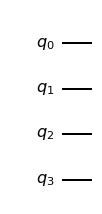

In [4]:
# Constant Oracle
constant_oracle = QuantumCircuit(n+1)


output = np.random.randint(2)
if output == 1:
    constant_oracle.x(n)
display(constant_oracle.draw(output = 'mpl'))

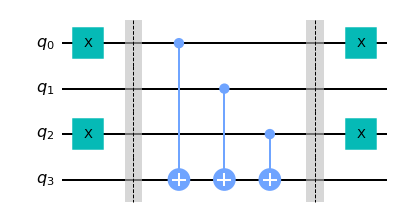

In [5]:
#Balanced Oracle
balanced_oracle = QuantumCircuit(n+1)
b_str = '101'
for i in range(0,len(b_str)):
    if b_str[i] == '1':
        balanced_oracle.x(i)

balanced_oracle.barrier()
for j in range(0,n):
    balanced_oracle.cx(j,n)
    
balanced_oracle.barrier()
for i in range(0,len(b_str)):
    if b_str[i] == '1':
        balanced_oracle.x(i)

display(balanced_oracle.draw(output = 'mpl'))

/tmp/ipykernel_169/1211346679.py:8: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += balanced_oracle


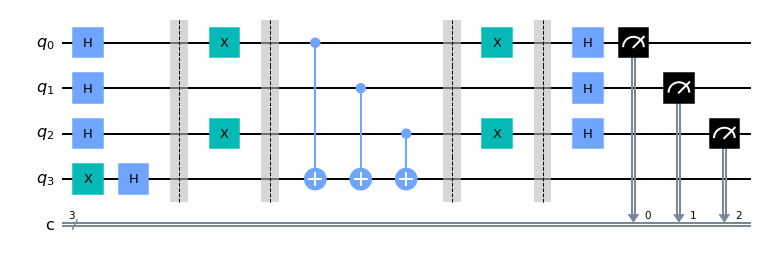

In [6]:
qc = QuantumCircuit(n+1,n)

for i in range(n):
    qc.h(i)
qc.x(n)
qc.h(n)
qc.barrier()
qc += balanced_oracle
qc.barrier()
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i,i)  

display(qc.draw(output = 'mpl'))  


Traceback (most recent call last):
  Input In [1] in <cell line: 2>
    aer_sim = Aer.get_backend('aer_simulator')
NameError: name 'Aer' is not defined

Use %tb to get the full traceback.


In [11]:

provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.tools.monitor import job_monitor
qcomp = provider.get_backend('ibmq_belem')
job = execute(qc,backend = qcomp)
job_monitor(job)


Job Status: job has successfully run


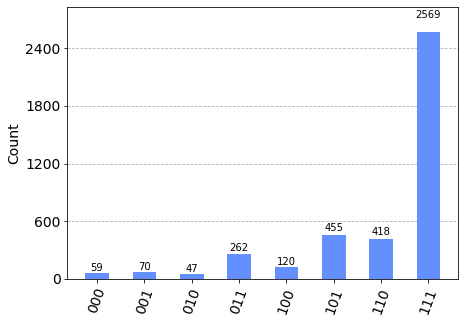

In [13]:
result = job.result()
plot_histogram(result.get_counts())

In [ ]:

plot_histogram(results.get_counts(qc))